In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [2]:
# Load the dataset
df = pd.read_csv("CAR DETAILS.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(3577, 8)

In [5]:
name = df["name"].str.split(" ", expand = True)
df["car_maker"] = name[0]
df["car_model"] = name[1]

In [6]:
# Calculate car age
df["car_age"] = 2023 - df["year"]
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [7]:
df.drop(["name"], axis=1, inplace=True)

In [8]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [9]:
encoder= LabelEncoder()

In [10]:
# Creating a for loop for Encoding multiple columns
encoded_columns = ['fuel', 'seller_type', 'transmission', 'owner']

for i in encoded_columns:
  df[i] = encoder.fit_transform(df[i])

In [11]:
# Encoding data with get dummies
df = pd.get_dummies(df, drop_first=True, columns = ["car_maker", "car_model"])
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,car_maker_Audi,car_maker_BMW,...,car_model_Xcent,car_model_Xenon,car_model_Xylo,car_model_Yaris,car_model_Yeti,car_model_Zen,car_model_Zest,car_model_i10,car_model_i20,car_model_redi-GO
0,2007,60000,70000,4,1,1,0,16,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2007,135000,50000,4,1,1,0,16,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2012,600000,100000,1,1,1,0,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2017,250000,46000,4,1,1,0,6,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,450000,141000,1,1,1,2,9,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Split data into features and target
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [14]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [15]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_age', 'car_maker_Audi', 'car_maker_BMW',
       ...
       'car_model_Xcent', 'car_model_Xenon', 'car_model_Xylo',
       'car_model_Yaris', 'car_model_Yeti', 'car_model_Zen', 'car_model_Zest',
       'car_model_i10', 'car_model_i20', 'car_model_redi-GO'],
      dtype='object', length=220)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_models(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f"Evaluating {name}:")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("MAE:", mae)
        print("MSE:", mse)
        print("R2 Score:", r2)
        print("Training Score: ", model.score(X_train, y_train))
        print("Testing Score: ", model.score(X_test, y_test))
        print()
        
# Call the function to evaluate models        
evaluate_models(models, X_train, y_train, X_test, y_test)

Evaluating Linear Regression:
MAE: 24797841954.34773
MSE: 1.5496370794670223e+23
R2 Score: -619750551094.5542
Training Score:  0.872003699867952
Testing Score:  -619750551094.5542

Evaluating Ridge Regression:
MAE: 137963.57592398472
MSE: 61647023720.00287
R2 Score: 0.753453389634863
Training Score:  0.8353856562603826
Testing Score:  0.753453389634863

Evaluating Lasso Regression:


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.808e+13, tolerance: 7.481e+10
  model = cd_fast.enet_coordinate_descent(


MAE: 137629.84305804304
MSE: 75604791172.13174
R2 Score: 0.6976317125135616
Training Score:  0.8719644145792877
Testing Score:  0.6976317125135616

Evaluating KNeighbors Regressor:
MAE: 248512.07625698324
MSE: 231132373399.61838
R2 Score: 0.07562604374629467
Training Score:  0.42018636272514254
Testing Score:  0.07562604374629467

Evaluating Random Forest Regressor:
MAE: 125697.81096932564
MSE: 84659422248.48802
R2 Score: 0.661419281397311
Training Score:  0.9553331528002399
Testing Score:  0.661419281397311



In [17]:
###  using hyper-perameter tuingng Random Forest Regressionrandom_state = 7, max_depth=10
rf= RandomForestRegressor(max_depth=15, random_state = 7)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=7)

In [18]:
def scores(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)
  print("MAE: ", mae)
  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("R2 Score: ", r2)

def model_score(model):
  print("Training Score: ", model.score(X_train, y_train))
  print("Testing Score: ", model.score(X_test, y_test))


In [19]:
model_score(rf)

y_pred= rf.predict(X_test)

scores(y_test,y_pred)

Training Score:  0.9412689356064691
Testing Score:  0.6534427437227408
MAE:  130501.65534461169
MSE:  86653892204.89693
RMSE:  294370.33173351036
R2 Score:  0.6534427437227408


In [20]:
### Saving the best model using Pickle
with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [21]:
df_sample = df.sample(n=20, random_state = 15)
df_sample.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,car_maker_Audi,car_maker_BMW,...,car_model_Xcent,car_model_Xenon,car_model_Xylo,car_model_Yaris,car_model_Yeti,car_model_Zen,car_model_Zest,car_model_i10,car_model_i20,car_model_redi-GO
249,2018,500000,32000,4,1,1,0,5,False,False,...,False,False,False,False,False,False,False,False,False,False
1869,2016,360000,30000,4,1,1,0,7,False,False,...,False,False,False,False,False,False,False,False,False,False
3319,2016,700000,160000,1,1,1,0,7,False,False,...,False,False,False,False,False,False,False,False,False,False
3964,2014,550000,58231,1,0,1,0,9,False,False,...,False,False,False,False,False,False,False,False,False,False
1258,2017,220000,40000,4,1,1,0,6,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Saving the Sample Dataset
df_sample.to_csv("sample-dataset.csv")

In [23]:
#### Loading the best model using Pickle

# Load the saved trained ML model
with open('rfmodel.pkl', 'rb') as file:
    best_model = pickle.load(file)
best_model

RandomForestRegressor(max_depth=15, random_state=7)

In [24]:
### Selecting 20 Dependent and Independent Variable randomly from dataset

x_sample = df_sample.drop("selling_price", axis = 1)
y_sample = df_sample["selling_price"]
print(x_sample.shape)
print(y_sample.shape)

(20, 219)
(20,)


In [25]:
#### Generate the Predictions for randomly 20 points selected from dataset
ypred_sample = best_model.predict(x_sample)
ypred_sample

array([545328.20639797, 386977.07452511, 583162.67049442, 487639.98307821,
       312253.73679448,  94574.40887038,  98124.93592948, 151483.71561906,
        75775.9905503 , 235430.91982023, 506610.24147349, 389170.68794413,
       294239.57934604,  67914.87034321, 336481.14185957, 328365.00617634,
       708614.54645158, 153254.72458754, 321076.42669673, 303977.18799332])

In [26]:
model_score(best_model)

scores(y_sample,ypred_sample)

Training Score:  0.9412689356064691
Testing Score:  0.6534427437227408
MAE:  51917.82630214841
MSE:  4943236226.119478
RMSE:  70308.15191796381
R2 Score:  0.8906569289819508


In [27]:
# Perform cross-validation for the RandomForestRegressor
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("Cross-Validation MSE Scores:", cv_mse_scores)
print("Mean MSE:", cv_mse_scores.mean())

Cross-Validation MSE Scores: [1.22960125e+11 6.52214677e+10 2.96210549e+10 2.76516086e+10
 1.82274698e+11]
Mean MSE: 85545790721.53165


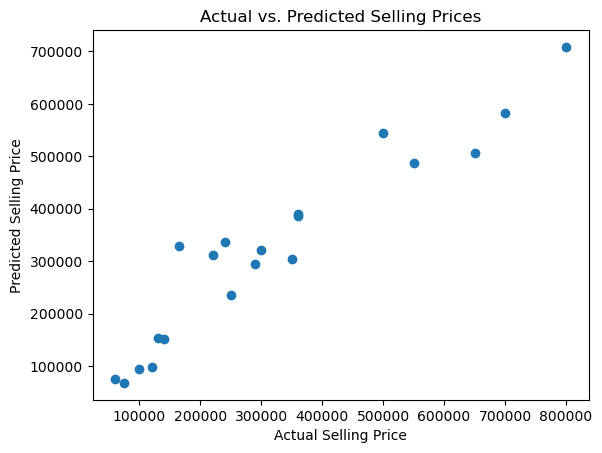

In [28]:
# Visualize predicted vs. actual selling prices
plt.scatter(y_sample, ypred_sample)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()